# Real-Time Communication System Powered by AI for Specially Abled
## CNN Model for Image Prediction
### Team ID: PNT2022TMID35896

#### 1. Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2

import splitfolders
import os

import string

import random

import nltk

from tensorflow.keras.preprocessing import image, sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from tensorflow.keras.utils import to_categorical

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Convolution2D, MaxPooling2D, Flatten,Dropout

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from skimage.transform import resize
from sklearn.metrics import classification_report, log_loss, accuracy_score

#### 2. Load the DataSet

In [2]:
DataSet = r'''C:\Users\manok\Documents\Sem_7\HX5001-HX6001\Project Development Phase\Main Project 2\Dataset\Gesture Image Pre-Processed Data'''

In [3]:
# splitfolders.ratio(DataSet,output='''C:\\Users\\manok\\Documents\\Sem_7\\HX5001-HX6001\\Project Development Phase\\Main Project 2\\Dataset\\Split''',ratio=(.8,0,.2),group_prefix=None)

#### 3. Image Preprocessing
##### 3.1 Import ImageDataGenerator Library 

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

##### 3.2. Apply ImageDataGenerator functionality

In [5]:
x_train = train_datagen.flow_from_directory('Dataset/Split/train', target_size=(50,50),
                                            class_mode='categorical', batch_size=300, color_mode="grayscale")

Found 44400 images belonging to 37 classes.


In [6]:
x_test = test_datagen.flow_from_directory('Dataset/Split/test', target_size=(50,50),
                                            class_mode='categorical', batch_size=300, color_mode="grayscale")

Found 11100 images belonging to 37 classes.


In [7]:
x_train.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35,
 '_': 36}

#### 4. Model Building
##### 4.1 Initialize the model

In [8]:
model=Sequential()

##### 4.2 Add the Convolution Layer

In [9]:
model.add(Convolution2D(filters=32, kernel_size=(3,3), input_shape=(50,50,1), activation='relu'))

##### 4.3 Add the Pooling Layer

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Dropout(0.25))

##### 4.2 Add the Convolution Layer

In [12]:
model.add(Convolution2D(64,(3,3), activation='relu'))

##### 4.3 Add the Pooling Layer

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Dropout(0.25))

##### 4.2 Add the Convolution Layer

In [15]:
model.add(Convolution2D(128,(3,3), activation='relu'))

##### 4.3 Add the Pooling Layer

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Dropout(0.25))

##### 4.2 Add the Convolution Layer

In [18]:
model.add(Convolution2D(256,(3,3), activation='relu'))

##### 4.3 Add the Pooling Layer

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Dropout(0.25))

##### 4.4 Add the Flatten Layer

In [21]:
model.add(Flatten())

##### 4.5 Add the Dense Layer

In [22]:
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
# model.add(Dense(100, activation='relu'))

In [23]:
model.add(Dense(37, activation='softmax'))

##### 4.6 Compile the Model

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

##### 4.7 Fit the Model

In [26]:
epo=5
history = model.fit(x_train, steps_per_epoch=len(x_train), epochs=epo, validation_data=x_test, validation_steps=len(x_test))
# history = model.fit(x_train, batch_size = 596, verbose = 1, epochs=epo, validation_data=x_test)

Epoch 1/5
148/148 [==============================] - 621s 4s/step - loss: 1.3820 - accuracy: 0.5761 - val_loss: 0.2260 - val_accuracy: 0.9277
Epoch 2/5
148/148 [==============================] - 409s 3s/step - loss: 0.2043 - accuracy: 0.9297 - val_loss: 0.0541 - val_accuracy: 0.9820
Epoch 3/5
148/148 [==============================] - 472s 3s/step - loss: 0.1160 - accuracy: 0.9595 - val_loss: 0.0354 - val_accuracy: 0.9903
Epoch 4/5
148/148 [==============================] - 389s 3s/step - loss: 0.0769 - accuracy: 0.9734 - val_loss: 0.0117 - val_accuracy: 0.9964
Epoch 5/5
148/148 [==============================] - 205s 1s/step - loss: 0.0564 - accuracy: 0.9802 - val_loss: 0.0077 - val_accuracy: 0.9984


##### 4.8 Save the Model

In [27]:
model.save('aslpng1.h5')

#### 5.Test the Model
##### 5.1 Load the Saved Model

In [28]:
model=load_model('aslpng1.h5')

##### 5.2 Pre-Process it and Predict

In [29]:
def detect(frame):
    img=resize(frame,(50,50,1))
    img=np.expand_dims(img,axis=0)
    if(np.max(img)>1):
        img=img/255.0
    prediction=model.predict(img)
    # print(frame)
    print(frame.shape)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    # print(prediction)
    prediction=np.argmax(model.predict(img),axis=1) #model.predict_classes(img)
    print(prediction)
    # return prediction

1/1 [==============================] - 1s 1s/step
(50, 50)
1/1 [==============================] - 0s 32ms/step
[2]


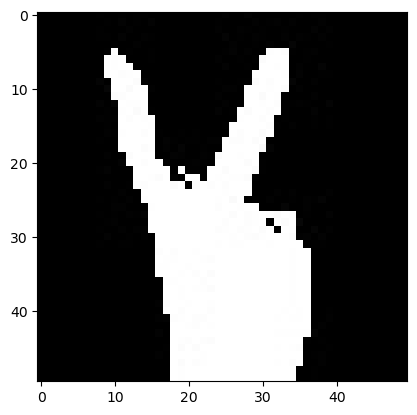

In [30]:
frame=cv2.imread(r'''C:\Users\manok\Documents\Sem_7\HX5001-HX6001\Project Development Phase\Main Project 2\Dataset\Split\train\2\16.jpg''', 0)
data=detect(frame)

1/1 [==============================] - 0s 32ms/step
(50, 50)
1/1 [==============================] - 0s 32ms/step
[2]


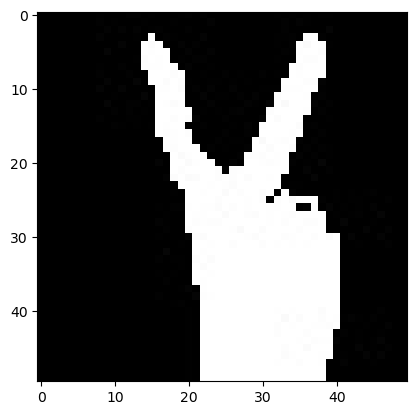

In [31]:
frame=cv2.imread(r'''C:\Users\manok\Documents\Sem_7\HX5001-HX6001\Project Development Phase\Main Project 2\Dataset\Split\test\2\28.jpg''', 0)
data=detect(frame)

1/1 [==============================] - 0s 62ms/step
(50, 50)
1/1 [==============================] - 0s 32ms/step
[36]


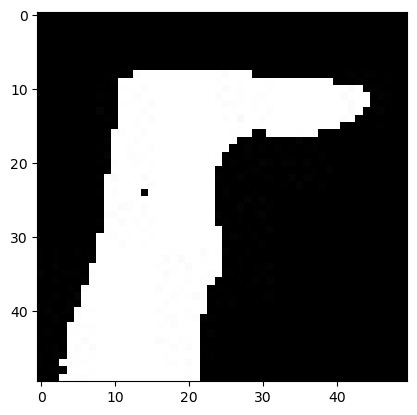

In [32]:
frame=cv2.imread(r'''C:\Users\manok\Documents\Sem_7\HX5001-HX6001\Project Development Phase\Main Project 2\Dataset\Split\train\_\30.jpg''', 0)
data=detect(frame)

1/1 [==============================] - 0s 32ms/step
(50, 50, 3)
1/1 [==============================] - 0s 47ms/step
[36]


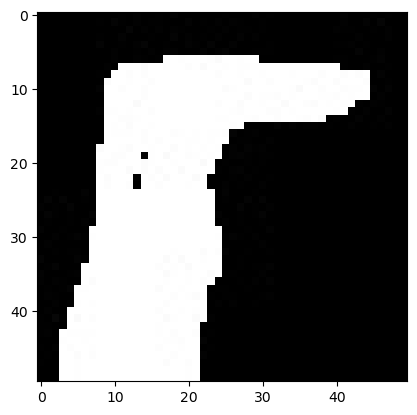

In [33]:
frame=cv2.imread(r'''C:\Users\manok\Documents\Sem_7\HX5001-HX6001\Project Development Phase\Main Project 2\Dataset\Split\test\_\103.jpg''')
data=detect(frame)

1/1 [==============================] - 0s 31ms/step
(50, 50, 3)
1/1 [==============================] - 0s 31ms/step
[16]


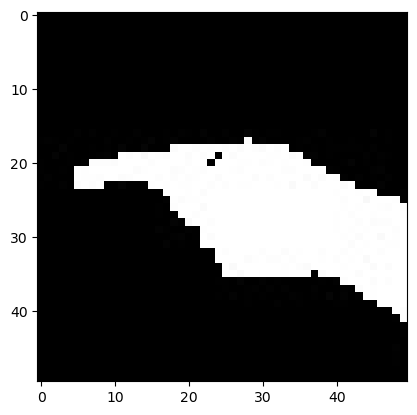

In [34]:
frame=cv2.imread(r'''C:\Users\manok\Documents\Sem_7\HX5001-HX6001\Project Development Phase\Main Project 2\Dataset\Split\train\G\1000.jpg''')
data=detect(frame)

1/1 [==============================] - 0s 31ms/step
(50, 50, 3)
1/1 [==============================] - 0s 141ms/step
[16]


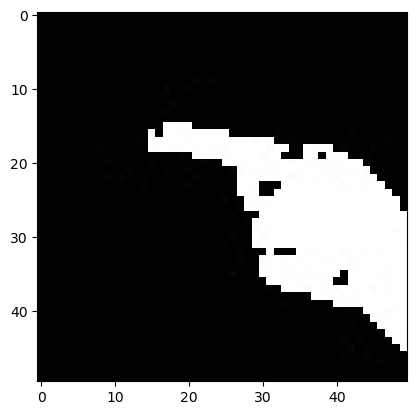

In [35]:
frame=cv2.imread(r'''C:\Users\manok\Documents\Sem_7\HX5001-HX6001\Project Development Phase\Main Project 2\Dataset\Split\test\G\12.jpg''')
data=detect(frame)

1/1 [==============================] - 0s 47ms/step
(50, 50, 3)
1/1 [==============================] - 0s 31ms/step
[36]


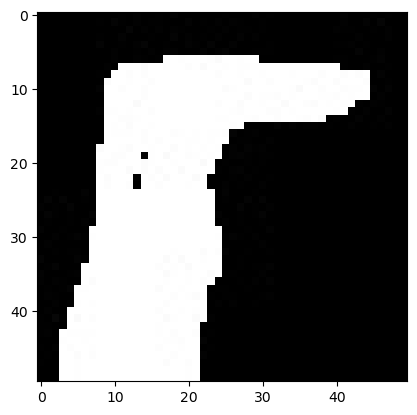

In [36]:
frame=cv2.imread(r'''C:\Users\manok\Documents\Sem_7\HX5001-HX6001\Project Development Phase\Main Project 2\Dataset\Split\test\_\103.jpg''')
data=detect(frame)

1/1 [==============================] - 0s 72ms/step
(50, 50, 3)
1/1 [==============================] - 0s 44ms/step
[10]


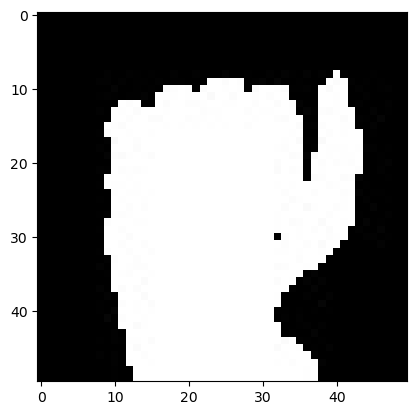

In [37]:
frame=cv2.imread(r'''C:\Users\manok\Documents\Sem_7\HX5001-HX6001\Project Development Phase\Main Project 2\Dataset\Split\test\A\103.jpg''')
data=detect(frame)

1/1 [==============================] - 0s 31ms/step
(50, 50, 3)
1/1 [==============================] - 0s 16ms/step
[8]


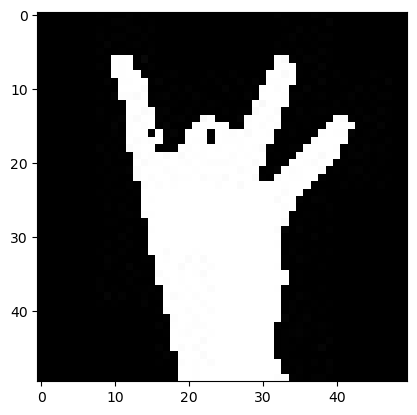

In [38]:
frame=cv2.imread(r'''C:\Users\manok\Documents\Sem_7\HX5001-HX6001\Project Development Phase\Main Project 2\Dataset\Split\test\8\103.jpg''')
data=detect(frame)

1/1 [==============================] - 0s 47ms/step
(50, 50, 3)
1/1 [==============================] - 0s 16ms/step
[8]


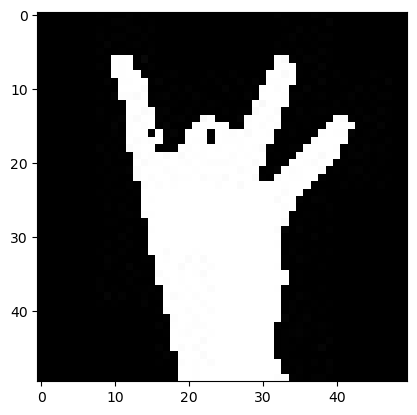

In [39]:
frame=cv2.imread(r'''C:\Users\manok\Documents\Sem_7\HX5001-HX6001\Project Development Phase\Main Project 2\Dataset\Gesture Image Pre-Processed Data\8\103.jpg''')
data=detect(frame)

1/1 [==============================] - 0s 24ms/step
(50, 50, 3)
1/1 [==============================] - 0s 31ms/step
[19]


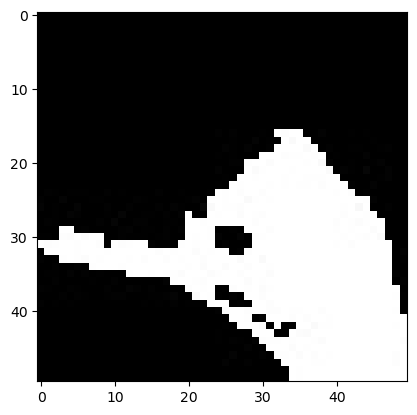

In [40]:
frame=cv2.imread(r'''C:\Users\manok\Documents\Sem_7\HX5001-HX6001\Project Development Phase\Main Project 2\Dataset\Gesture Image Pre-Processed Data\J\803.jpg''')
data=detect(frame)

1/1 [==============================] - 0s 47ms/step
(50, 50, 3)
1/1 [==============================] - 0s 38ms/step
[25]


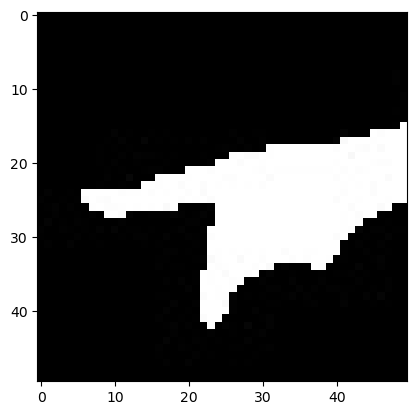

In [41]:
frame=cv2.imread(r'''C:\Users\manok\Documents\Sem_7\HX5001-HX6001\Project Development Phase\Main Project 2\Dataset\Gesture Image Pre-Processed Data\P\603.jpg''')
data=detect(frame)

1/1 [==============================] - 0s 31ms/step
(50, 50, 3)
1/1 [==============================] - 0s 31ms/step
[4]


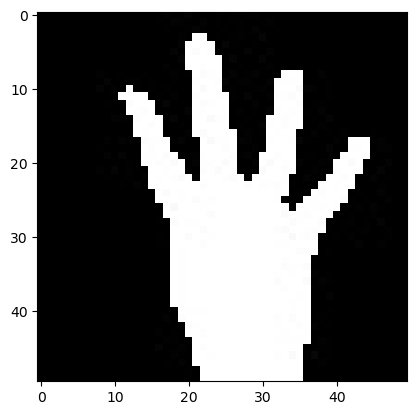

In [42]:
frame=cv2.imread(r'''C:\Users\manok\Documents\Sem_7\HX5001-HX6001\Project Development Phase\Main Project 2\Dataset\Gesture Image Pre-Processed Data\4\1099.jpg''')
data=detect(frame)

1/1 [==============================] - 0s 32ms/step
(50, 50, 3)
1/1 [==============================] - 0s 32ms/step
[32]


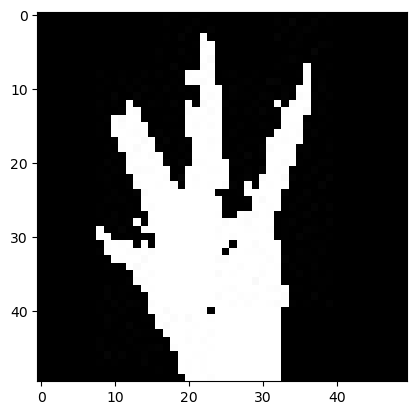

In [43]:
frame=cv2.imread(r'''C:\Users\manok\Documents\Sem_7\HX5001-HX6001\Project Development Phase\Main Project 2\Dataset\Gesture Image Pre-Processed Data\W\1448.jpg''')
data=detect(frame)